In [88]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure

In [64]:
# Прочитаем файл

data = pd.read_csv('C:\\Users\\Irina\\Documents\\Python_for_analytics\\Diploma\\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [65]:
# Сводка о данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
# Рассчитаем основные статистики

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [67]:
# Рассчитаем медиану для всех значений

data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [68]:
# Рассчитаем моду для всех значений

data.mode().iloc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

Text(0.5, 1.0, 'Корреляционная матрица')

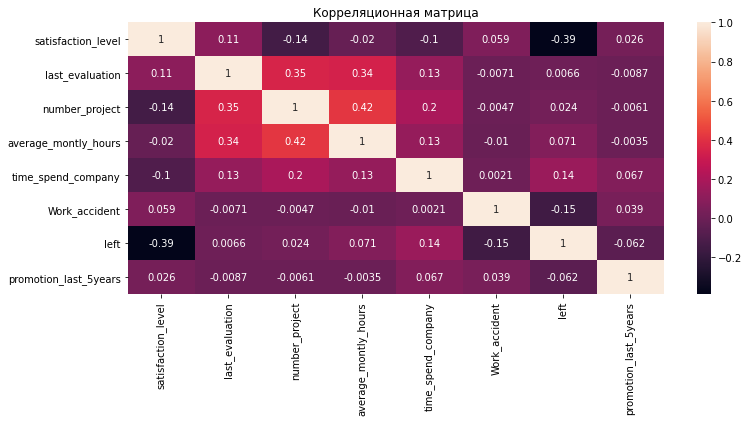

In [69]:
# Построим корреляционную матрицу

sns.heatmap(data.corr(), annot = True).set_title('Корреляционная матрица')

### Выводы
* Наиболее коррелирующие переменные average_monthly_hours и number_project
* Наименее коррелирующие переменные worc_accident и time_spend_company

In [70]:
# Количество сотрудников, работающих в каждом отделе

filtered = data[['satisfaction_level', 'department']].groupby('department').count().sort_values(by = 'satisfaction_level', ascending = False)
filtered

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


Text(0.5, 1.0, 'Распределение количества сотрудников по департаментам')

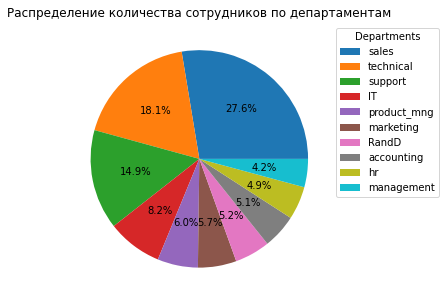

In [129]:
### альтернативная версия графика
# chart = filtered.plot(kind = 'pie', x = 'satisfaction_level', figsize=(8, 8), autopct='%1.2f%%', title = 'Распределение количества сотрудников по департаментам', subplots=True)
# plt.legend().remove() #убрать легенду
# plt.axis('off') #убрать подписи оси

plt.pie(filtered['satisfaction_level'], autopct='%1.1f%%' )
plt.legend(labels=labels, title="Departments", loc="upper right", bbox_to_anchor=(1.4, 1), ncol=1)
plt.title('Распределение количества сотрудников по департаментам')

In [73]:
# Количество сотрудников по уровню зарплаты

data[['satisfaction_level', 'salary']].groupby('salary').count().sort_values(by = 'satisfaction_level', ascending = False)

,satisfaction_level
salary,
low,7316
medium,6446
high,1237


In [74]:
# Количество сотрудников по уровню зарплаты внутри каждого департамента

df = data[['department', 'salary', 'satisfaction_level']]
df_1 = df.groupby(['department','salary']).count().reset_index().sort_values(by = ['department','satisfaction_level'], ascending = [True, False])
df_1

,department,salary,satisfaction_level
1,IT,low,609
2,IT,medium,535
0,IT,high,83
5,RandD,medium,372
4,RandD,low,364
3,RandD,high,51
7,accounting,low,358
8,accounting,medium,335
6,accounting,high,74
11,hr,medium,359


In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

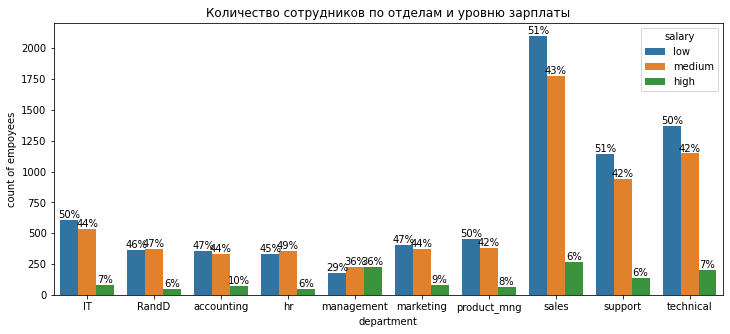

In [83]:
# Нарисуем на графике Количество сотрудников по уровню зарплаты внутри каждого департамента

ax = sns.barplot(x = 'department' , y = 'satisfaction_level', hue = 'salary', data = df_1)
ax.set(ylabel='count of empoyees')
ax.set_title('Количество сотрудников по отделам и уровню зарплаты')
barPerc(df_1, 'department', ax)

In [82]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df_1['department'].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

### Сформулируем гипотезу

H0 Сотрудники с высоким окладом проводят <= времени на работе, чем сотрудники с низким окладом

H1 Сотрудники с высоким окладом проводят > времени на работе, чем сотрудники с низким окладом

In [15]:
working_hours_high = data[data['salary'] == 'high']['average_montly_hours']
working_hours_low = data[data['salary'] == 'low']['average_montly_hours']

In [16]:
# Проведем тест

from scipy import stats as st
result = st.ttest_ind(working_hours_high, working_hours_low, equal_var=False)
alpha = 0.05
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят > времени на работе, чем сотрудники с низким окладом ')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят времени на работе столько же или меньше, чем сотрудники с низким окладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят времени на работе столько же или меньше, чем сотрудники с низким окладом


### Выводы

* Тест показал, что сотрудники проводят на работе в среднем одинаковое количество времени независимо от уровня зарплаты.

In [17]:
# Убедимся в этом на средних

print(working_hours_high.mean())
print(working_hours_low.mean())
print(data[data['salary'] == 'medium']['average_montly_hours'].mean())

199.86742118027485
200.9965828321487
201.33834936394663


In [18]:
# Рассчитаем показатели для уволившихся сотрудников

left_y = data[data['left'] == 1]
promoted_left = left_y[left_y['promotion_last_5years'] == 1].satisfaction_level.count()
total_left = left_y['satisfaction_level'].count()
sat_level_left = left_y.satisfaction_level.mean()
projects_left = left_y.number_project.mean()
print(f' Доля уволившихся сотрудников с повышением за последние 5 лет {round(((promoted_left/total_left) *100), 2)}% \n Уровень удовлетворенности уволившихся сотрудников {round(sat_level_left, 2)} \n Среднее количество проектов {round(projects_left,2)}' )

 Доля уволившихся сотрудников с повышением за последние 5 лет 0.53% 
 Уровень удовлетворенности уволившихся сотрудников 0.44 
 Среднее количество проектов 3.86


In [19]:
# Рассчитаем показатели для неуволившихся сотрудников

stayed = data[data['left'] == 0]
promoted_stayed = stayed[stayed['promotion_last_5years'] == 1].satisfaction_level.count()
total_stayed = stayed['satisfaction_level'].count()
sat_level_stayed = stayed.satisfaction_level.mean()
projects_stayed = stayed.number_project.mean()
print(f' Доля неуволившихся сотрудников с повышением за последние 5 лет {round(((promoted_stayed/total_stayed) *100), 2)}% \n Уровень удовлетворенности неуволившихся сотрудников {round(sat_level_stayed, 2)} \n Среднее количество проектов {round(projects_stayed,2)}' )


 Доля неуволившихся сотрудников с повышением за последние 5 лет 2.63% 
 Уровень удовлетворенности неуволившихся сотрудников 0.67 
 Среднее количество проектов 3.79


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [21]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = data['left']

In [35]:
# Разделим данные на тестовые и обучающие

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
lda = LinearDiscriminantAnalysis()

In [37]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
# делаем прогноз на тестовой выборке
prediction = lda.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# смотрим разницу факта и прогноза
result = pd.DataFrame({'test':y_test, 'pred':prediction})
result

,test,pred
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
13388,0,0
10463,0,1
5331,0,0
7499,0,0


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

### Выводы

Модель описывает 76% данных, что говорит о достаточно хорошем качетсве модели.